In [1]:
import numpy as np
from sklearn.datasets import load_sample_image, load_sample_images
from skimage import io
import cv2

# Visualisation libraries

## Text
from colorama import Fore, Back, Style
from IPython.display import Image, display, Markdown, Latex

## matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (17, 6)

%matplotlib inline

## seaborn
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# HTML
from IPython.core.display import HTML
HTML("""<style>.output_png {    display: table-cell;    text-align: center;    vertical-align: middle;}</style>""")

We use the sklearn [image dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_sample_images.html#sklearn.datasets.load_sample_images) to demonstrate basic operations using Open CV.

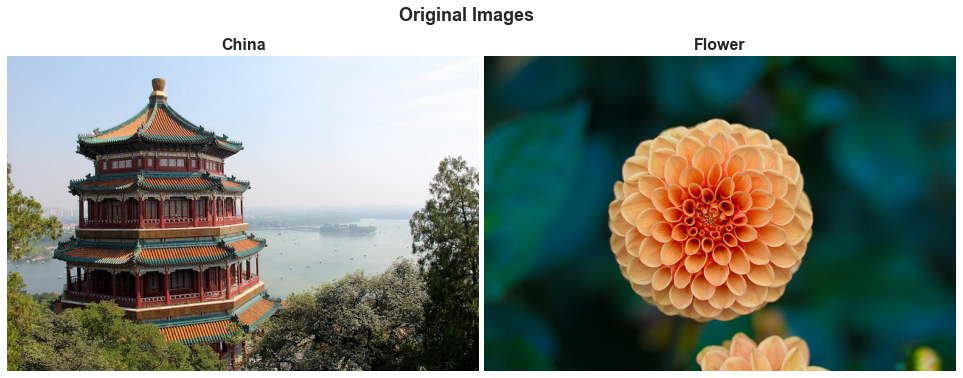

In [2]:
Images = load_sample_images()
Names = [x.split("\\")[-1].replace('.jpg','').title() for x in Images['filenames']]
Images = Images['images']

def ImShow(Images, Names, Title = 'Images', axis_tight = False):
    fig, ax = plt.subplots(1, 2 , figsize = (17, 6))
    ax = ax.ravel()
    font = FontProperties()
    font.set_weight('bold')
    for i in range(2):
        _ = ax[i].imshow(Images[i])
        if axis_tight:
            _ = ax[i].axis('tight')
        _ = ax[i].axis('off')
        _ = ax[i].set_title(Names[i], fontproperties=font, fontsize = 16)
    _ = fig.subplots_adjust(wspace= 0.01)
    if Title:
        _ = fig.suptitle(Title, fontproperties=font, fontsize = 18)
    return fig, ax
# Image Show
_,_ = ImShow(Images, Names, Title = 'Original Images')

# Drawing Functions

***
## line

[line](https://docs.opencv.org/2.4/modules/core/doc/drawing_functions.html?highlight=rectangle#line) function can be used for drawing a line segment connecting two points.

```Python
cv2.line(img, pt1, pt2, color[, thickness[, lineType[, shift]]]) → None
```

Parameters:
* img – Image.
* pt1 – First point of the line segment.
* pt2 – Second point of the line segment.
* color – Line color.
* thickness – Line thickness.
* lineType –
* Type of the line:
    * 8 (or omitted) - 8-connected line.
    * 4 - 4-connected line.
    * CV_AA - antialiased line.
* shift – Number of fractional bits in the point coordinates.


<font color='Blue'><b>Example</b></font>:

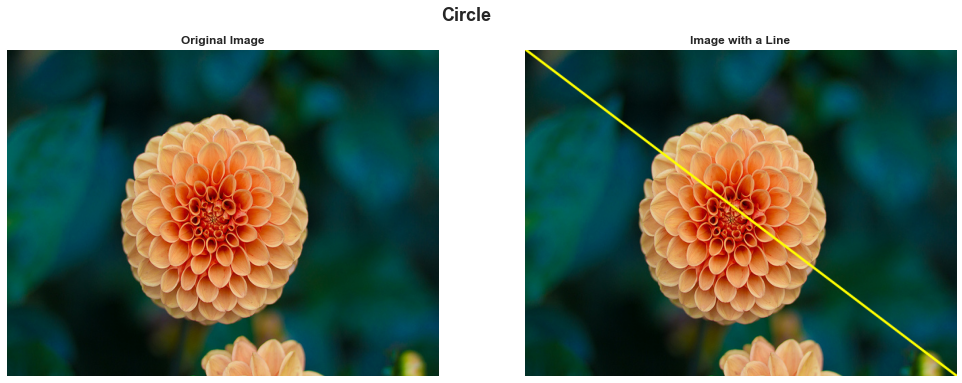

In [3]:
Img = Images[1].copy()
Out = Img.copy()

Colors={'White':(255, 255, 255), 'Black':(0, 0, 0), 'Red':(255,0,0),'Green':(0,255,0), 'Blue':(0,0,255),
        'Yellow':(255,255,0), 'Purple':(128,0,128), 'Indigo':(75,0,130),'OrangeRed':(255,69,0)}

_ = cv2.line(Out, (0, 0), Out.shape[:2][::-1], Colors['Yellow'], thickness=2, lineType=cv2.LINE_AA)

fig, ax = plt.subplots(1, 2 , figsize = (17, 6))
ax = ax.ravel()
font = FontProperties()
font.set_weight('bold')

_ = fig.suptitle('Circle', fontproperties=font, fontsize = 18)

_ = ax[0].imshow(Img)
_ = ax[0].set_title('Original Image', fontproperties=font, fontsize = 12)
_ = ax[1].imshow(Out)
_ = ax[1].set_title('Image with a Line', fontproperties=font, fontsize = 12)
for i in range(2):
    _ = ax[i].set_aspect('auto')
    _ = ax[i].axis('off')
del i
del Img, Out

***
## Rectangle

[rectangle](https://docs.opencv.org/2.4/modules/core/doc/drawing_functions.html?highlight=rectangle#rectangle) draws a simple, thick, or filled up-right rectangle.

```Python
cv2.rectangle(Image, pt1, pt2, color[, thickness[, lineType[, shift]]]) → None
```

Parameters:	
* pt1 – Vertex of the rectangle.
* pt2 – Vertex of the rectangle opposite to pt1 .
* color – Rectangle color or brightness (grayscale image).
* thickness – Thickness of lines that make up the rectangle. Negative values, like CV_FILLED , mean that the function has to draw a filled rectangle.
* lineType – Type of the line. See the line() description.
* shift – Number of fractional bits in the point coordinates.

<font color='Blue'><b>Example</b></font>:

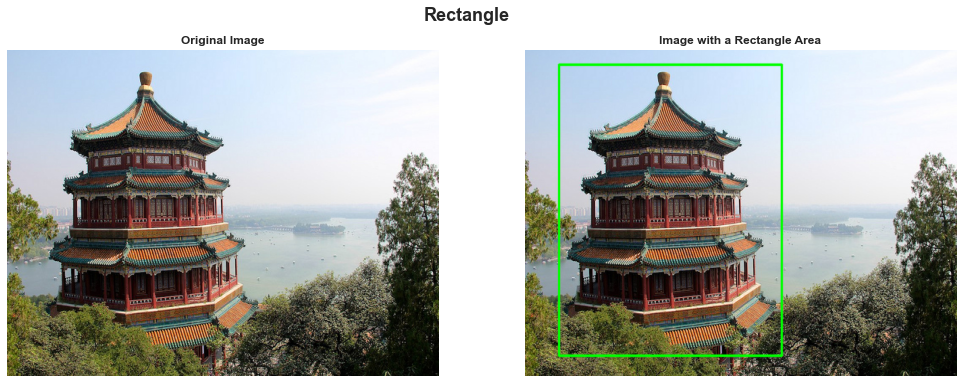

In [4]:
Img = Images[0].copy()
Out = Img.copy()

_ = cv2.rectangle(Out, (50, 20), (380, 400), Colors['Green'], thickness=2, lineType=cv2.LINE_AA)

fig, ax = plt.subplots(1, 2 , figsize = (17, 6))
ax = ax.ravel()

_ = fig.suptitle('Rectangle', fontproperties=font, fontsize = 18)

_ = ax[0].imshow(Img)
_ = ax[0].set_title('Original Image', fontproperties=font, fontsize = 12)
_ = ax[1].imshow(Out)
_ = ax[1].set_title('Image with a Rectangle Area', fontproperties=font, fontsize = 12)
for i in range(2):
    _ = ax[i].set_aspect('auto')
    _ = ax[i].axis('off')
del i
del Img, Out

<font color='Blue'><b>Example</b></font>:

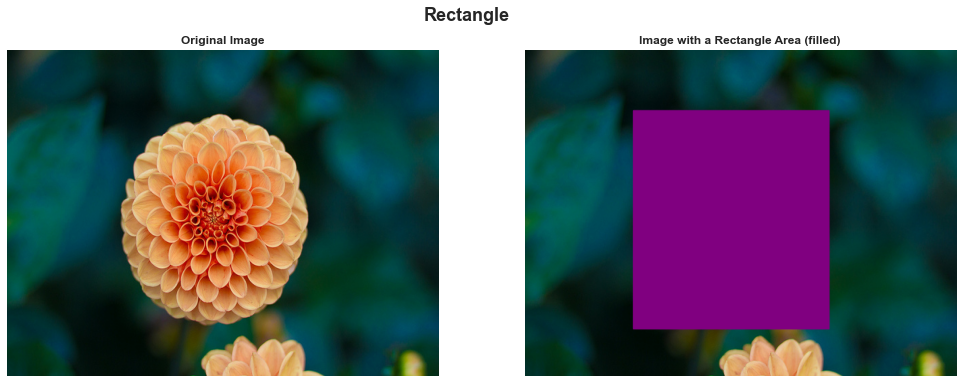

In [5]:
Img = Images[1].copy()
Out = Img.copy()

_ = cv2.rectangle(Out, (160, 80), (450, 365), Colors['Purple'], thickness=-1, lineType=cv2.LINE_AA)

fig, ax = plt.subplots(1, 2 , figsize = (17, 6))
ax = ax.ravel()

_ = fig.suptitle('Rectangle', fontproperties=font, fontsize = 18)

_ = ax[0].imshow(Img)
_ = ax[0].set_title('Original Image', fontproperties=font, fontsize = 12)
_ = ax[1].imshow(Out)
_ = ax[1].set_title('Image with a Rectangle Area (filled)', fontproperties=font, fontsize = 12)
for i in range(2):
    _ = ax[i].set_aspect('auto')
    _ = ax[i].axis('off')
del i
del Img, Out

***
## Circle
[circle](https://docs.opencv.org/2.4/modules/core/doc/drawing_functions.html?highlight=rectangle#circle) draws a circle.

```Python
cv2.circle(Img, center, radius, color[, thickness[, lineType[, shift]]]) → None
```
Parameters:	
* center – Center of the circle.
* radius – Radius of the circle.
* color – Circle color.
* thickness – Thickness of the circle outline, if positive. Negative thickness means that a filled circle is to be drawn.
* lineType – Type of the circle boundary. See the line() description.
* shift – Number of fractional bits in the coordinates of the center and in the radius value.

<font color='Blue'><b>Example</b></font>:

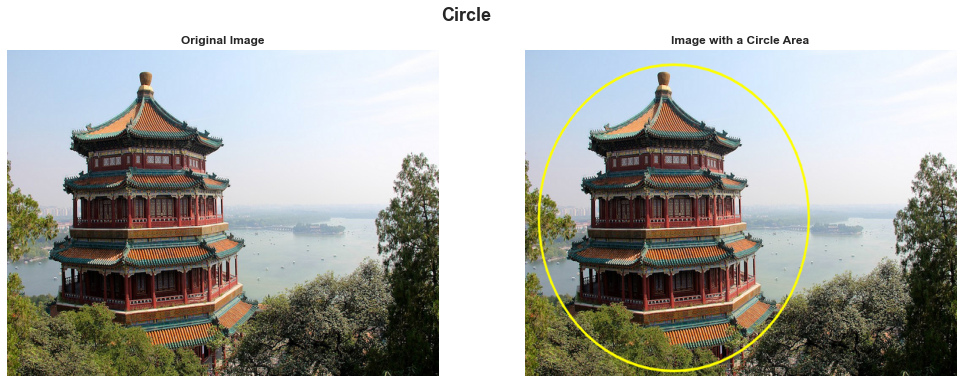

In [6]:
Img = Images[0].copy()
Out = Img.copy()

_ = cv2.circle(Out, (220, 220), 200, Colors['Yellow'], thickness=2, lineType=cv2.LINE_AA)

fig, ax = plt.subplots(1, 2 , figsize = (17, 6))
ax = ax.ravel()
_ = fig.suptitle('Circle', fontproperties=font, fontsize = 18)

_ = ax[0].imshow(Img)
_ = ax[0].set_title('Original Image', fontproperties=font, fontsize = 12)
_ = ax[1].imshow(Out)
_ = ax[1].set_title('Image with a Circle Area', fontproperties=font, fontsize = 12)
for i in range(2):
    _ = ax[i].set_aspect('auto')
    _ = ax[i].axis('off')
del i
del Img, Out

<font color='Blue'><b>Example</b></font>:

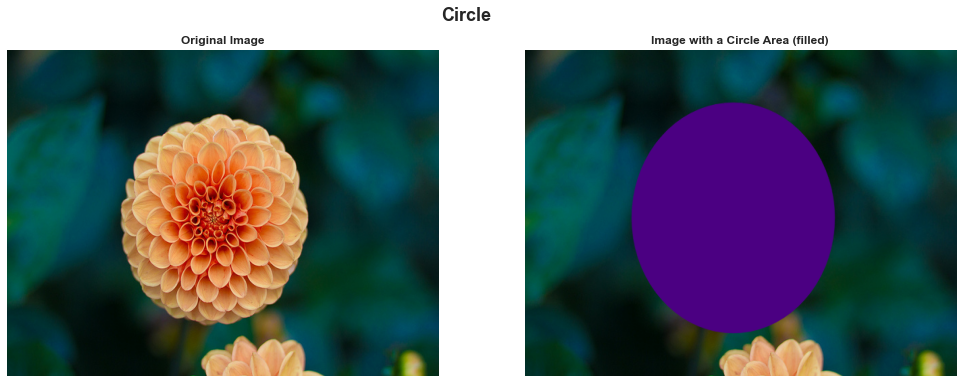

In [7]:
Img = Images[1].copy()
Out = Img.copy()

_ = cv2.circle(Out, (308, 220), 150, Colors['Indigo'], thickness=-1, lineType=cv2.LINE_AA)

fig, ax = plt.subplots(1, 2 , figsize = (17, 6))
ax = ax.ravel()
_ = fig.suptitle('Circle', fontproperties=font, fontsize = 18)

_ = ax[0].imshow(Img)
_ = ax[0].set_title('Original Image', fontproperties=font, fontsize = 12)
_ = ax[1].imshow(Out)
_ = ax[1].set_title('Image with a Circle Area (filled)', fontproperties=font, fontsize = 12)
for i in range(2):
    _ = ax[i].set_aspect('auto')
    _ = ax[i].axis('off')
del i
del Img, Out

***
## Ellipse
[ellipse](https://docs.opencv.org/2.4/modules/core/doc/drawing_functions.html?highlight=rectangle#ellipse) draws a simple or thick elliptic arc or fills an ellipse sector.

```Python
cv2.ellipse(img, center, axes, angle, startAngle, endAngle, color[, thickness[, lineType[, shift]]]) → None
```
Parameters:	
* img – Image.
* center – Center of the ellipse.
* axes – Half of the size of the ellipse main axes.
* angle – Ellipse rotation angle in degrees.
* startAngle – Starting angle of the elliptic arc in degrees.
* endAngle – Ending angle of the elliptic arc in degrees.
* box – Alternative ellipse representation via RotatedRect or CvBox2D. This means that the function draws an ellipse inscribed in the rotated rectangle.
* color – Ellipse color.
* thickness – Thickness of the ellipse arc outline, if positive. Otherwise, this indicates that a filled ellipse sector is to be drawn.
* lineType – Type of the ellipse boundary. See the line() description.
* shift – Number of fractional bits in the coordinates of the center and values of axes.

<font color='Blue'><b>Example</b></font>:

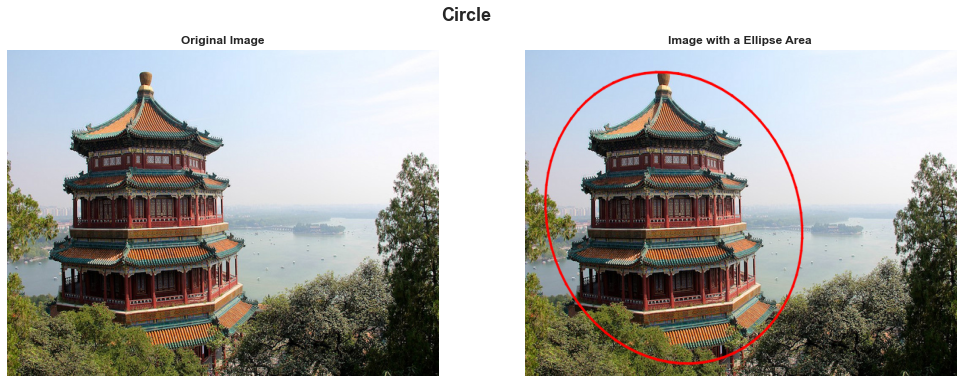

In [8]:
Img = Images[0].copy()
Out = Img.copy()
_ = cv2.ellipse(Out, (220, 220), (200, 180), 45, 0, 360, Colors['Red'], thickness=2, lineType=cv2.LINE_AA)

fig, ax = plt.subplots(1, 2 , figsize = (17, 6))
ax = ax.ravel()
_ = fig.suptitle('Circle', fontproperties=font, fontsize = 18)

_ = ax[0].imshow(Img)
_ = ax[0].set_title('Original Image', fontproperties=font, fontsize = 12)
_ = ax[1].imshow(Out)
_ = ax[1].set_title('Image with a Ellipse Area', fontproperties=font, fontsize = 12)
for i in range(2):
    _ = ax[i].set_aspect('auto')
    _ = ax[i].axis('off')
del i
del Img, Out

***
## clipLine
[clipLine](https://docs.opencv.org/2.4/modules/core/doc/drawing_functions.html?highlight=rectangle#clipline) clips the line against the image rectangle..

```Python
cv2.clipLine(imgRect, pt1, pt2) → retval, pt1, pt2
```
Parameters:	
* imgSize – Image size. The image rectangle is Rect(0, 0, imgSize.width, imgSize.height) .
* imgRect – Image rectangle.
* pt1 – First line point.
* pt2 – Second line point.

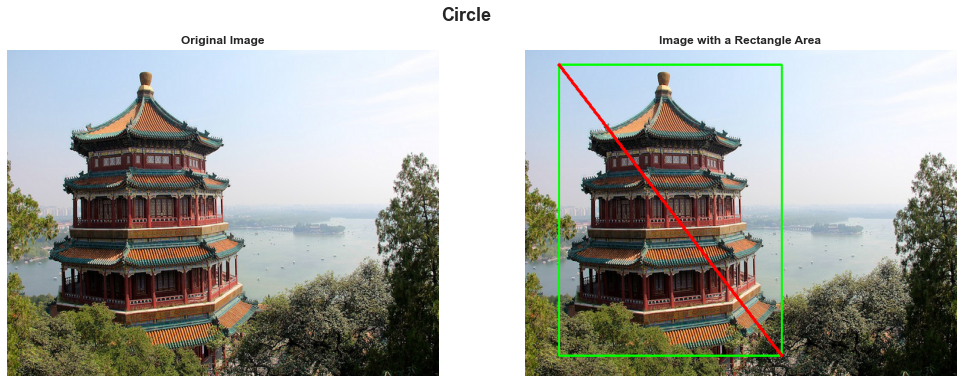

In [9]:
Img = Images[0].copy()
Out = Img.copy()

_ = cv2.rectangle(Out, (50, 20), (380, 400), Colors['Green'], 2)
_ = ret, p1, p2 = cv2.clipLine((0, 0, Out.shape[0], Out.shape[1]), (50, 20), (380, 400))

if ret:
    cv2.line(Out, p1, p2, Colors['Red'], 3)

fig, ax = plt.subplots(1, 2 , figsize = (17, 6))
ax = ax.ravel()
_ = fig.suptitle('Circle', fontproperties=font, fontsize = 18)

_ = ax[0].imshow(Img)
_ = ax[0].set_title('Original Image', fontproperties=font, fontsize = 12)
_ = ax[1].imshow(Out)
_ = ax[1].set_title('Image with a Rectangle Area', fontproperties=font, fontsize = 12)
for i in range(2):
    _ = ax[i].set_aspect('auto')
    _ = ax[i].axis('off')
del i
del Img, Out

***
## getTextSize
[getTextSize](https://docs.opencv.org/2.4/modules/core/doc/drawing_functions.html?highlight=rectangle#gettextsize) calculates the width and height of a text string.

```Python
cv2.getTextSize(text, fontFace, fontScale, thickness) → retval, baseLine
```

Parameters:	
* text – Input text string.
* text_string – Input text string in C format.
* fontFace – Font to use. See the putText() for details.
* fontScale – Font scale. See the putText() for details.
* thickness – Thickness of lines used to render the text. See putText() for details.
* baseLine – Output parameter - y-coordinate of the baseline relative to the bottom-most text point.
* baseline – Output parameter - y-coordinate of the baseline relative to the bottom-most text point.
* font – Font description in terms of old C API.
* text_size – Output parameter - The size of a box that contains the specified text.

## putText
[putText](https://docs.opencv.org/2.4/modules/core/doc/drawing_functions.html?highlight=rectangle#puttext) draws a text string.

```Python
cv2.putText(img, text, org, fontFace, fontScale, color[, thickness[, lineType[, bottomLeftOrigin]]]) → None
```

Parameters:	
* img – Image.
* text – Text string to be drawn.
* org – Bottom-left corner of the text string in the image.
* font – CvFont structure initialized using InitFont().
* fontFace – Font type. One of FONT_HERSHEY_SIMPLEX, FONT_HERSHEY_PLAIN, FONT_HERSHEY_DUPLEX, FONT_HERSHEY_COMPLEX, * FONT_HERSHEY_TRIPLEX, FONT_HERSHEY_COMPLEX_SMALL, FONT_HERSHEY_SCRIPT_SIMPLEX, or FONT_HERSHEY_SCRIPT_COMPLEX, where each of the font ID’s can be combined with FONT_ITALIC to get the slanted letters.
* fontScale – Font scale factor that is multiplied by the font-specific base size.
* color – Text color.
* thickness – Thickness of the lines used to draw a text.
* lineType – Line type. See the line for details.
* bottomLeftOrigin – When true, the image data origin is at the bottom-left corner. Otherwise, it is at the top-left corner.

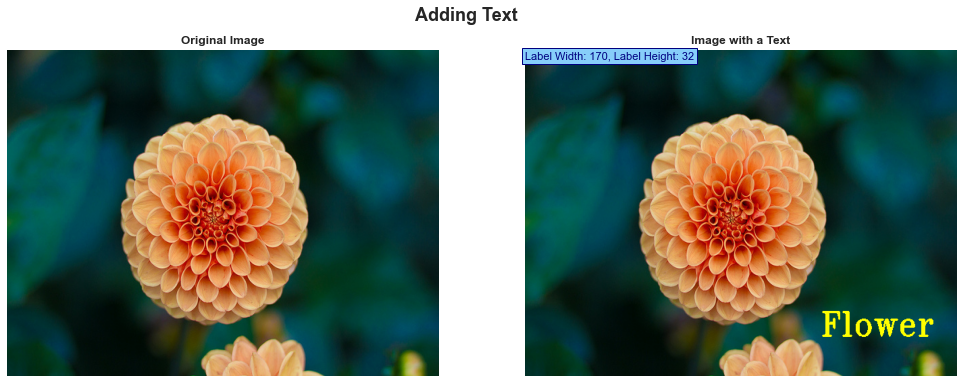

In [10]:
Img = Images[1].copy()
Out = Img.copy()

# getTextSize
(label_width, label_height), baseline = cv2.getTextSize(text = Names[1], fontFace = cv2.FONT_HERSHEY_TRIPLEX, fontScale = 1.5,
                                                    thickness = 2)
Out = cv2.putText(Out, text = Names[1],
                  org = (Out.shape[1] - label_width - int(0.05*Out.shape[1]),
                         Out.shape[0] - label_height - int(0.05*Out.shape[0])),
                  fontFace = cv2.FONT_HERSHEY_TRIPLEX, fontScale = 1.5, color = Colors['Yellow'], thickness = 2)

fig, ax = plt.subplots(1, 2 , figsize = (17, 6))
ax = ax.ravel()
_ = fig.suptitle('Adding Text', fontproperties=font, fontsize = 18)

_ = ax[0].imshow(Img)
_ = ax[0].set_title('Original Image', fontproperties=font, fontsize = 12)
_ = ax[1].imshow(Out)
_ = ax[1].set_title('Image with a Text', fontproperties=font, fontsize = 12)
for i in range(2):
    _ = ax[i].set_aspect('auto')
    _ = ax[i].axis('off')
del i
_ = ax[1].text(x = 0, y = int(0.02*Out.shape[1]),
               s = ('Label Width: %i, ' % label_width + 'Label Height: %i' % label_height),
               size=11, color = 'Navy', bbox=dict(boxstyle="square", ec='Navy',fc='LightSkyBlue'))

del Img, Out

***

## Refrences
1. [OpenCV documentation](https://docs.opencv.org/2.4/index.html)
2. [OpenCV-Python Tutorials](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_tutorials.html#opencv-python-tutorials)
***